<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [15]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [161]:
data = pd.read_csv('D:/Day 1/Life_Expectancy.csv')
data.head(3)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

In [166]:
data.dtypes
numericaldata = data.select_dtypes(include = np.number)
catdata = data.select_dtypes(exclude = np.number)

#numdata = data.select_dtypes(include = np.number)

In [167]:
data.shape

(124, 18)

In [168]:
## Winzoration
for i in numericaldata.columns:
    q1 = numericaldata[i].quantile(0.25)
    q3 = numericaldata[i].quantile(0.75)
    IQR = q3-q1
    UB = q3 + 1.5*IQR
    LB = q1 - 1.5*IQR
    UC = numericaldata[i].quantile(0.99)
    LC = numericaldata[i].quantile(0.01)
    for ind1 in numericaldata[i].index:
        if numericaldata.loc[ind1,i] > UB:
            numericaldata.loc[ind1,i] = UC
        if numericaldata.loc[ind1,i] < LB:
            numericaldata.loc[ind1,i] = LC
            
            

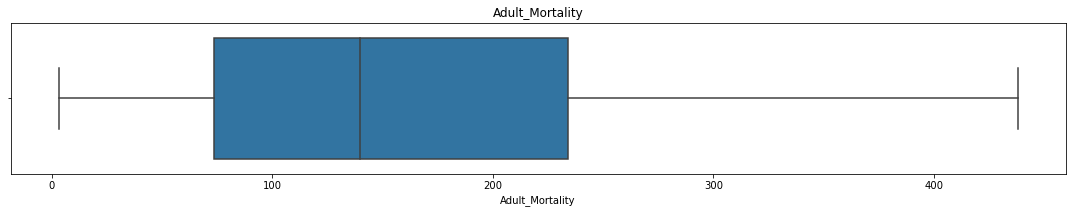

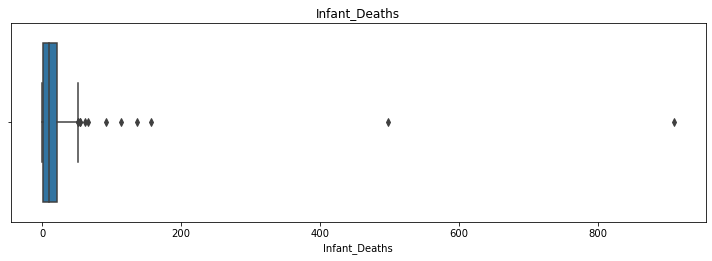

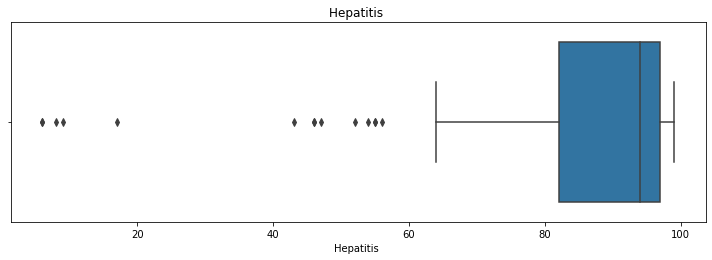

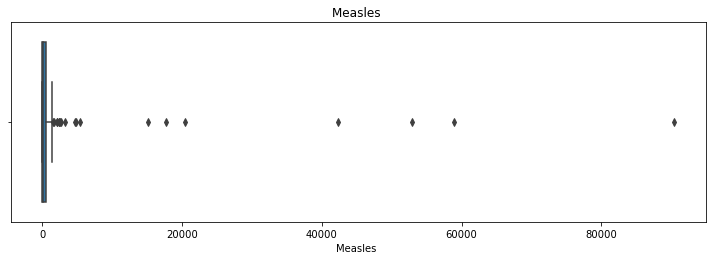

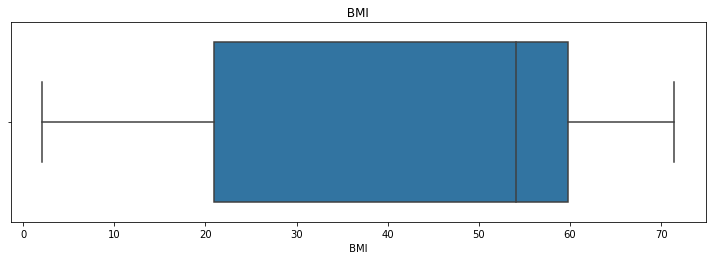

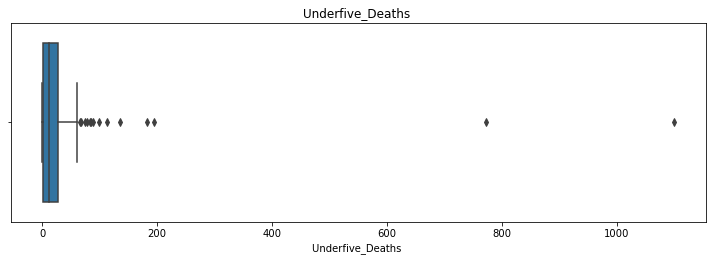

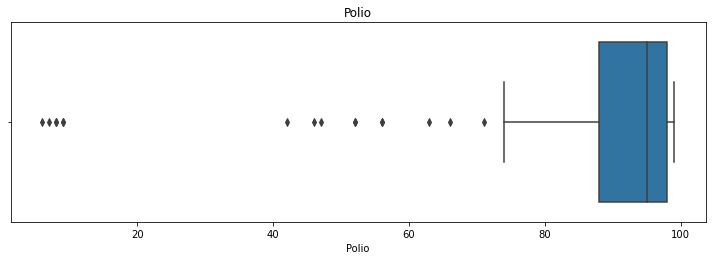

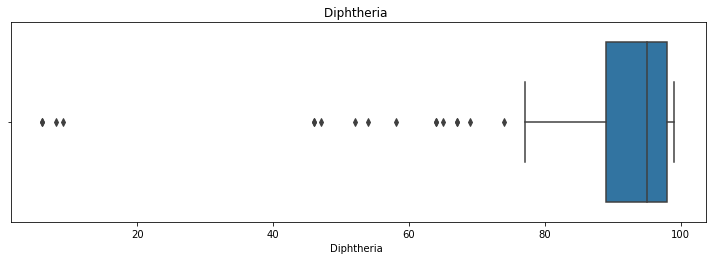

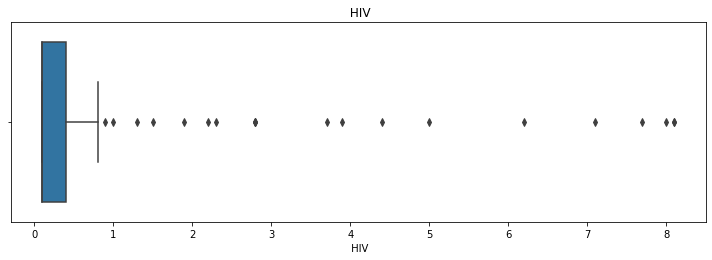

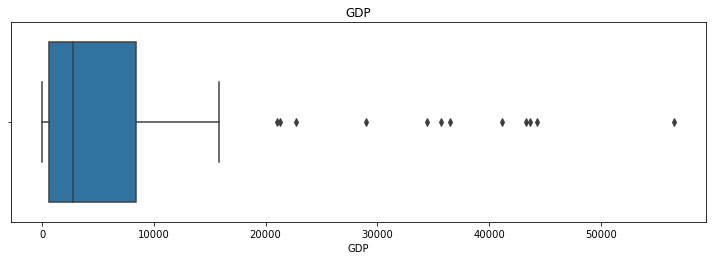

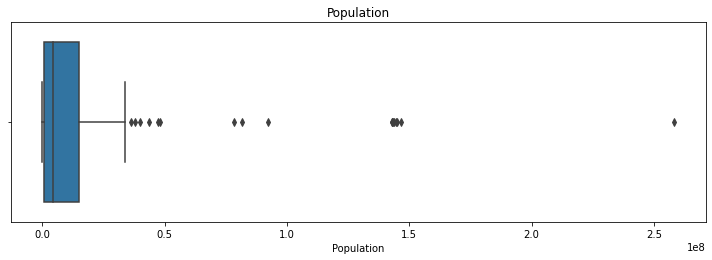

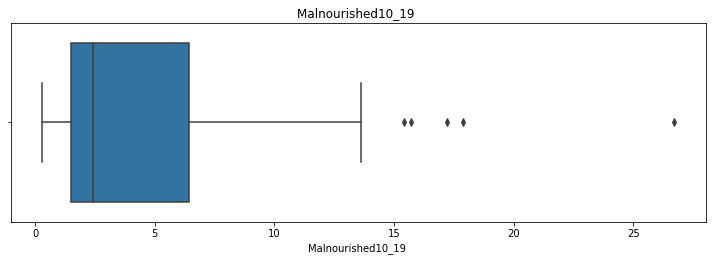

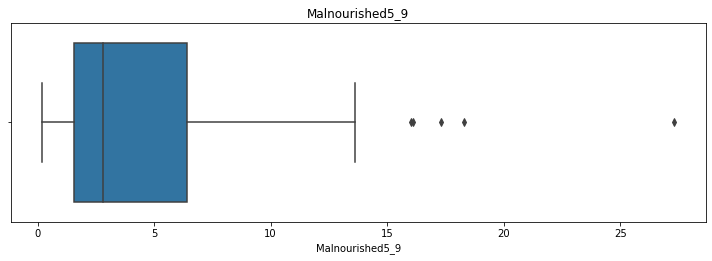

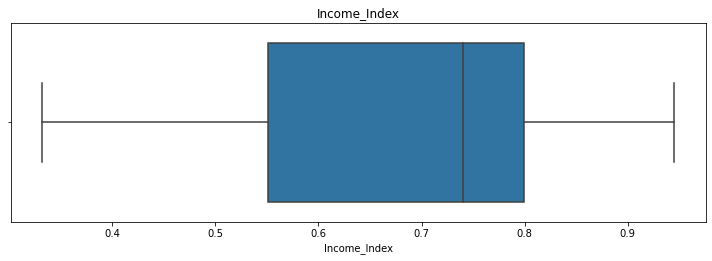

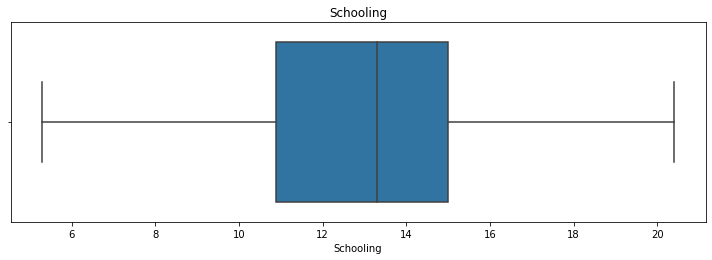

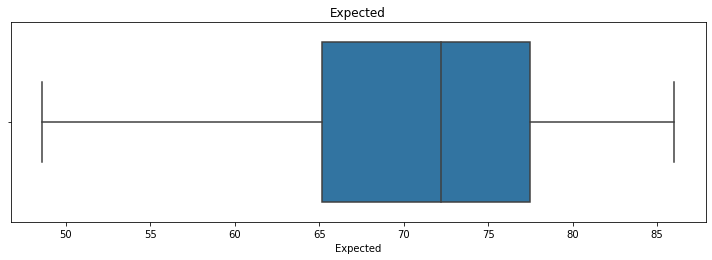

<Figure size 720x720 with 0 Axes>

In [93]:
row = 3
col = 1
count = 1
for i in numericaldata:
    plt.subplot(row,col,count)
    plt.title(i)
    sns.boxplot(data[i])
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10,10))


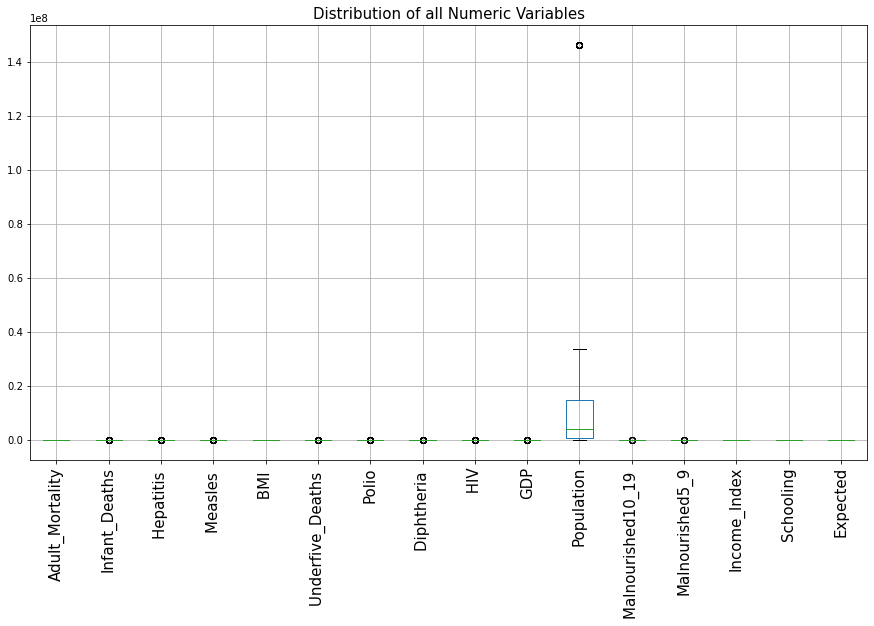

In [94]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
numericaldata.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [169]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
numdatamm = mm.fit_transform(numericaldata)
numdatamm = pd.DataFrame(numericaldata,columns = numericaldata.columns)

In [170]:
numdatamm.head(5)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,263,419.570000,65.000000,1154.000000,19.100000,639.830000,7.230000,6.460000,0.100000,584.259210,33736494.000000,17.739000,18.070000,0.479000,10.100000,65.000000
1,8,0.000000,98.000000,0.000000,57.200000,1.000000,98.000000,98.000000,0.100000,4575.763787,288914.000000,1.200000,1.300000,0.761000,14.200000,77.500000
2,19,21.000000,95.000000,63.000000,59.500000,24.000000,95.000000,95.000000,0.100000,4132.762920,146225912.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,335,419.570000,64.000000,118.000000,23.300000,639.830000,7.230000,6.460000,8.077000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,116,8.000000,94.000000,0.000000,62.800000,9.000000,93.000000,94.000000,0.100000,13467.123600,146225912.000000,1.000000,0.900000,0.826000,17.300000,76.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(numdatamm['Adult_Mortality'],numdatamm['Expected'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (86,)
y_train_slr (86,)
X_test_slr (38,)
y_test_slr (38,)


In [20]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Adult_Mortality
10,1.000000,129
112,1.000000,239
32,1.000000,92
82,1.000000,61
38,1.000000,119


In [21]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.15e-19
Time:                        23:14:45   Log-Likelihood:                -264.02
No. Observations:                  86   AIC:                             532.0
Df Residuals:                      84   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          82.6276      1.114     

In [ ]:
pval = 0
siglevel = 0.05
pval < siglevel so alternate hypothesis is selected

* adult mortality rate has an impact on life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(numdatamm['Income_Index'],numdatamm['Expected'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(SLR_model.summary())



X_train_slr (86,)
y_train_slr (86,)
X_test_slr (38,)
y_test_slr (38,)
                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     205.9
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.62e-24
Time:                        17:10:58   Log-Likelihood:                -253.14
No. Observations:                  86   AIC:                             510.3
Df Residuals:                      84   BIC:                             515.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [98]:
# predict the Total_Reimbursement using 'predict()' on training data
y_train_slr_pred = SLR_model.predict(X_train_slr)

# display the first five predicted values 
y_train_slr_pred.head()

10    66.263377
112   61.928768
32    74.845904
82    82.301433
38    78.747053
dtype: float64

In [99]:
# calculate the SSE on train dataset
sse = np.sum((y_train_slr - y_train_slr_pred)**2)
sse

1814.4052068999506

In [100]:
# compute SEE using the below formula 
# see =  np.sqrt(sse/(len(train_data) - k))    

# for SLR take k = 2, as there are two coefficients (parameters) in the model
see = np.sqrt(sse/(len(X_train_slr) - 2))    
see

4.6475866841732145

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
Immunization = data.iloc[:,[4,8,9]]


pandas.core.frame.DataFrame

In [120]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = Immunization

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = data['Expected']
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (86, 4)
y_train_full (86,)
X_test_full (38, 4)
y_test_full (38,)


In [121]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.239
Date:                Thu, 01 Apr 2021   Prob (F-statistic):            0.00234
Time:                        17:42:51   Log-Likelihood:                -298.86
No. Observations:                  86   AIC:                             605.7
Df Residuals:                      82   BIC:                             615.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.7010      3.961     14.569      

In [ ]:
# Polio and Diphtheria contribute significantly to the Expectancy variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = data['Status'], drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([Immunization, encoded_data], axis=1)



# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = data['Expected']


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (86, 5)
y_train_full (86,)
X_test_full (38, 5)
y_test_full (38,)
                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.242
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.25e-05
Time:                        08:52:40   Log-Likelihood:                -291.72
No. Observations:                  86   AIC:                             593.4
Df Residuals:                      81   BIC:                             605.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
## Status column has a signinficant impact on  Expectancy

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
data2 = data


In [135]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data2.drop('Expected', axis = 1)
df_feature = data2.drop('Country', axis = 1)
# create dataframe of target variable
df_target = data2['Expected']

In [136]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ', ' BMI ',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [137]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Status'], dtype='object')

In [138]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)

In [140]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)
df_reimb_dummy.drop('Expected',axis =1)
# display first five observations
df_reimb_dummy.head(2)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000,1


In [141]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (86, 18)
y_train_full (86,)
X_test_full (38, 18)
y_test_full (38,)


In [143]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.050e+20
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:08:48   Log-Likelihood:                 1616.3
No. Observations:                  86   AIC:                            -3197.
Df Residuals:                      68   BIC:                            -3152.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.933e-12   4.65

In [ ]:
# strong autocorerlationn and multicolinearity
# population variable is significant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
numdata = data.select_dtypes(include = np.number)

In [21]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(numdata.values, i) for i in range(numdata.shape[1])]

# create a column of variable names
vif["Features"] = numdata.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,213.724076,Income_Index
1,199.086252,Schooling
2,123.953576,Diphtheria
3,123.330495,Infant_Deaths
4,119.647204,Expected
5,111.723227,Underfive_Deaths
6,75.386085,Hepatitis
7,37.145103,Polio
8,30.546659,Malnourished10_19
9,29.288003,Malnourished5_9


In [144]:
# predict the Total_Reimbursement using 'predict()' on training data
y_train_slr_pred = MLR_full_model.predict(X_train_full)

# display the first five predicted values 
y_train_slr_pred.head()

10    71.800000
112   64.600000
32    79.100000
82    81.600000
38    77.600000
dtype: float64

In [145]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_slr_pred - y_train_slr.mean())**2)
ssr

6261.274534889606

In [146]:
# calculate the SSE on train dataset
sse = np.sum((y_train_slr - y_train_slr_pred)**2)
sse

2.384644066181197e-16

In [147]:
# calculate the SST on train dataset
sst = np.sum((y_train_slr - y_train_slr.mean())**2)
sst

6261.27453488372

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [164]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(numdatamm['Income_Index'],numdata['Expected'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (86,)
y_train_slr (86,)
X_test_slr (38,)
y_test_slr (38,)


In [160]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Income_Index
10,1.000000,0.575000
112,1.000000,0.475000
32,1.000000,0.773000
82,1.000000,0.945000
38,1.000000,0.863000


In [157]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     205.9
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.62e-24
Time:                        11:39:43   Log-Likelihood:                -253.14
No. Observations:                  86   AIC:                             510.3
Df Residuals:                      84   BIC:                             515.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       41.3394      2.144     19.283   

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [171]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = data['Adult_Mortality'], drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([Immunization, encoded_data], axis=1)



# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = data['Adult_Mortality']

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = data['Expected']


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (86, 2)
y_train_full (86,)
X_test_full (38, 2)
y_test_full (38,)
                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.15e-19
Time:                        12:05:17   Log-Likelihood:                -264.02
No. Observations:                  86   AIC:                             532.0
Df Residuals:                      84   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [172]:

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([data['Population'],data['Adult_Mortality']], axis=1)



# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()
# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = data['Expected']


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (86, 3)
y_train_full (86,)
X_test_full (38, 3)
y_test_full (38,)
                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     69.71
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.72e-18
Time:                        12:07:35   Log-Likelihood:                -264.02
No. Observations:                  86   AIC:                             534.0
Df Residuals:                      83   BIC:                             541.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
# addition of population has no significant impact

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
data1 = data

In [174]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data1.drop('Expected', axis = 1)
df_feature = data1.drop('Country', axis = 1)


# create dataframe of target variable
df_target = data['Expected']
df_feature

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000
5,Developing,118,1,94,33,54.900000,1,96,94,0.100000,369.654776,291695,2.100000,2.200000,0.741000,12.700000,74.800000
6,Developed,59,1,93,74,66.600000,1,93,93,0.100000,56554.387600,23789338,0.600000,0.600000,0.937000,20.400000,82.800000
7,Developed,65,0,93,309,57.600000,0,93,93,0.100000,43665.947000,8633169,1.900000,2.100000,0.892000,15.900000,81.500000
8,Developing,118,5,96,0,52.500000,6,98,96,0.100000,55.313820,9649341,2.800000,2.900000,0.758000,12.700000,72.700000
9,Developing,69,0,98,0,63.600000,0,98,98,0.100000,22688.878240,1378188,6.200000,6.100000,0.823000,14.500000,76.900000


In [175]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ', ' BMI ',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [176]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Status'], dtype='object')

In [177]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)


In [178]:
encoded_data.head(5)

,Status_Developing
0,1
1,1
2,1
3,1
4,1


In [179]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head(5)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000,1
2,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000,1


In [180]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (86, 18)
y_train_full (86,)
X_test_full (38, 18)
y_test_full (38,)


In [181]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.050e+20
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:12:47   Log-Likelihood:                 1616.3
No. Observations:                  86   AIC:                            -3197.
Df Residuals:                      68   BIC:                            -3152.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.933e-12   4.65

In [184]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.999670
Adult_Mortality,0.999601
Infant_Deaths,0.999946
Hepatitis,0.998901
Measles,0.999677
BMI,0.999951
Underfive_Deaths,0.999989
Polio,0.999995
Diphtheria,0.999992
HIV,0.999965


In [185]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Adult_Mortality',
 'Infant_Deaths',
 'Hepatitis ',
 'Measles ',
 ' BMI ',
 'Underfive_Deaths ',
 'Polio',
 'Diphtheria ',
 ' HIV',
 'GDP',
 'Malnourished10_19 ',
 'Malnourished5_9',
 'Income_Index',
 'Schooling',
 'Status_Developing']

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

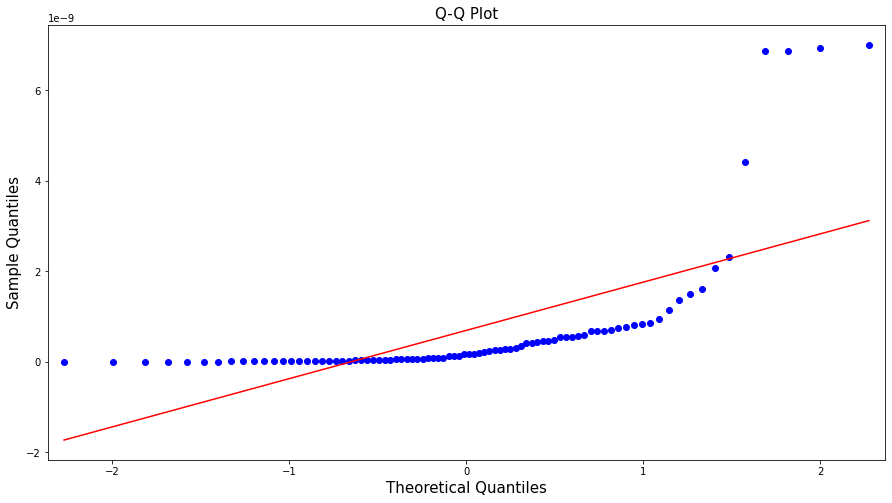

In [186]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# No data is not normal

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
encoded_data = pd.get_dummies(data = data['Status'], drop_first=True)


# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([data['GDP'], encoded_data], axis=1)




In [204]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (86, 3)
y_train_full (86,)
X_test_full (38, 3)
y_test_full (38,)


In [205]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     18.25
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.69e-07
Time:                        14:09:50   Log-Likelihood:                -290.73
No. Observations:                  86   AIC:                             587.5
Df Residuals:                      83   BIC:                             594.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6219      2.495     30.714      0.0

In [ ]:
# r SQUARE IS VER LOW NO SIGNIFICANT IMPACT

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
## We cannot build a model with all variables as 0

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [64]:
data = pd.read_csv('D:/Day 1/FEV_data.csv')
data.head(3)
data.head(3)

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.000000,F,smoker,1.708000
1,17,167.500000,F,smoker,1.724000
2,19,154.500000,F,smoker,1.720000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())



X_train_full (457, 3)
y_train_full (457,)
X_test_full (197, 3)
y_test_full (197,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          5.21e-122
Time:                        08:39:47   Log-Likelihood:                -312.02
No. Observations:                 457   AIC:                             630.0
Df Residuals:                     454   BIC:                             642.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
## Height is significant in predicting FEV

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Sex', 'Smoke_habit'], dtype='object')

In [71]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

,Sex_M,Smoke_habit_smoker
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [72]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = encoded_data['Smoke_habit_smoker']

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = data['FEV']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())



X_train_full (457, 2)
y_train_full (457,)
X_test_full (197, 2)
y_test_full (197,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     37.96
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.59e-09
Time:                        12:53:06   Log-Likelihood:                -574.82
No. Observations:                 457   AIC:                             1154.
Df Residuals:                     455   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## The pval is less than siglevel so it is a significant variable in prediction
## The adjusted R square is too low which indicates that this variable does not contribute to the model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns


## categorical
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns


# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head()

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (457, 5)
y_train_full (457,)
X_test_full (197, 5)
y_test_full (197,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     295.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          1.62e-124
Time:                        14:28:54   Log-Likelihood:                -299.78
No. Observations:                 457   AIC:                             609.6
Df Residuals:                     452   BIC:                             630.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns


## categorical
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns


# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head()

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

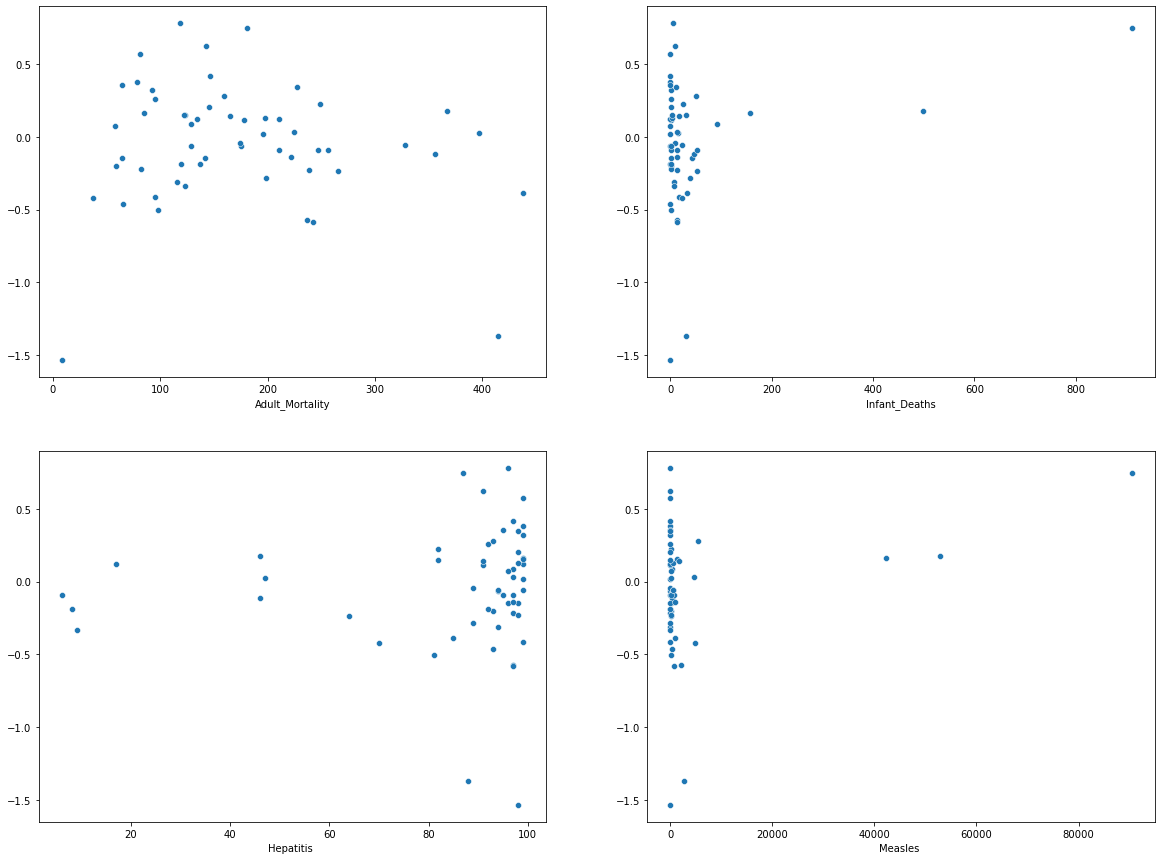

In [77]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_signi_var.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_signi_var[variable], MLR_full_model.resid , ax=subplot)

# display the plot
plt.show()

In [ ]:
# Infant deaths and Measles are dependent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

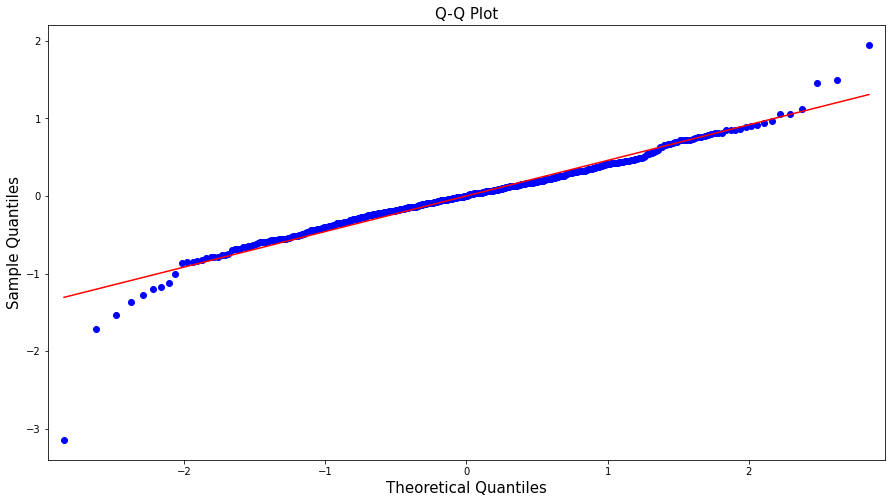

In [78]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [80]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_full_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)



Test statistic: 0.9539021253585815
P-Value: 9.505753822969254e-11


In [ ]:
pval < siglevel so data is not normal

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns


## categorical
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns


# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head()

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (457, 5)
y_train_full (457,)
X_test_full (197, 5)
y_test_full (197,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     295.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          1.62e-124
Time:                        16:15:42   Log-Likelihood:                -299.78
No. Observations:                 457   AIC:                             609.6
Df Residuals:                     452   BIC:                             630.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train_signi_var'
# y_train_signi_var: actual values of the target variable for the train dataset

# For testing set:
# test_pred: prediction made by the model on the test dataset 'X_test_signi_var'
# y_test_signi_var: actual values of the target variable for the test dataset

# predict the output of the target variable from the train data 
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = MLR_full_model.predict(X_train_full)

# predict the output of the target variable from the test data
test_pred = MLR_full_model.predict(X_test_full)

In [85]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_full, train_pred),4)

# print the MSE for the training set
#print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_full, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on test set:  0.2443


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_full, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_full, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.4663
Root Mean Squared Error (RMSE) on test set:  0.4942


In [87]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_full, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_full, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.3389
Mean Absolute Error (MAE) on test set:  0.3611


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns


## categorical
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns


# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head()

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (523, 5)
y_train_full (523,)
X_test_full (131, 5)
y_test_full (131,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     325.8
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          7.10e-140
Time:                        16:32:40   Log-Likelihood:                -346.03
No. Observations:                 523   AIC:                             702.1
Df Residuals:                     518   BIC:                             723.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = data.drop('FEV', axis = 1)

# create dataframe of target variable
df_target = data['FEV']


# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns


## categorical
df_cat = data.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns


# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data

# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_reimb_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_reimb_dummy.head()

# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_reimb_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)



# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_test_full, X_test_full).fit()

# print the summary output
print(MLR_full_model.summary())

X_train_full (523, 5)
y_train_full (523,)
X_test_full (131, 5)
y_test_full (131,)
                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     56.91
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.41e-27
Time:                        16:35:04   Log-Likelihood:                -91.138
No. Observations:                 131   AIC:                             192.3
Df Residuals:                     126   BIC:                             206.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
Train : 0.7
Test : 0.6 
    
Model is slightly overfitted